In [135]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [136]:
df = pd.read_csv(r"C:\Users\Admin\Documents\Đại học\DS102\Thực Hành\BTTH1\forest+fires\forestfires.csv")
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [137]:
def convert_month(month: str) -> int:
    month_dict = {
        'jan': 1,
        'feb': 2,
        'mar': 3,
        'apr': 4,
        'may': 5,
        'jun': 6,
        'jul': 7,
        'aug': 8,
        'sep': 9,
        'oct': 10,
        'nov': 11,
        'dec': 12,
    }
    return month_dict[month]

In [138]:
def convert_day(day: str) -> int:
    day_dict = {
        'sun': 0,
        'mon': 1, 
        'tue': 2,
        'wed': 3,
        'thu': 4,
        'fri': 5,
        'sat': 6,
    }
    return day_dict[day]

In [139]:
df['day'] = df['day'].apply(convert_day)
df['month'] = df['month'].apply(convert_month)

In [140]:
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,3,0,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,0,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,8,0,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,8,0,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


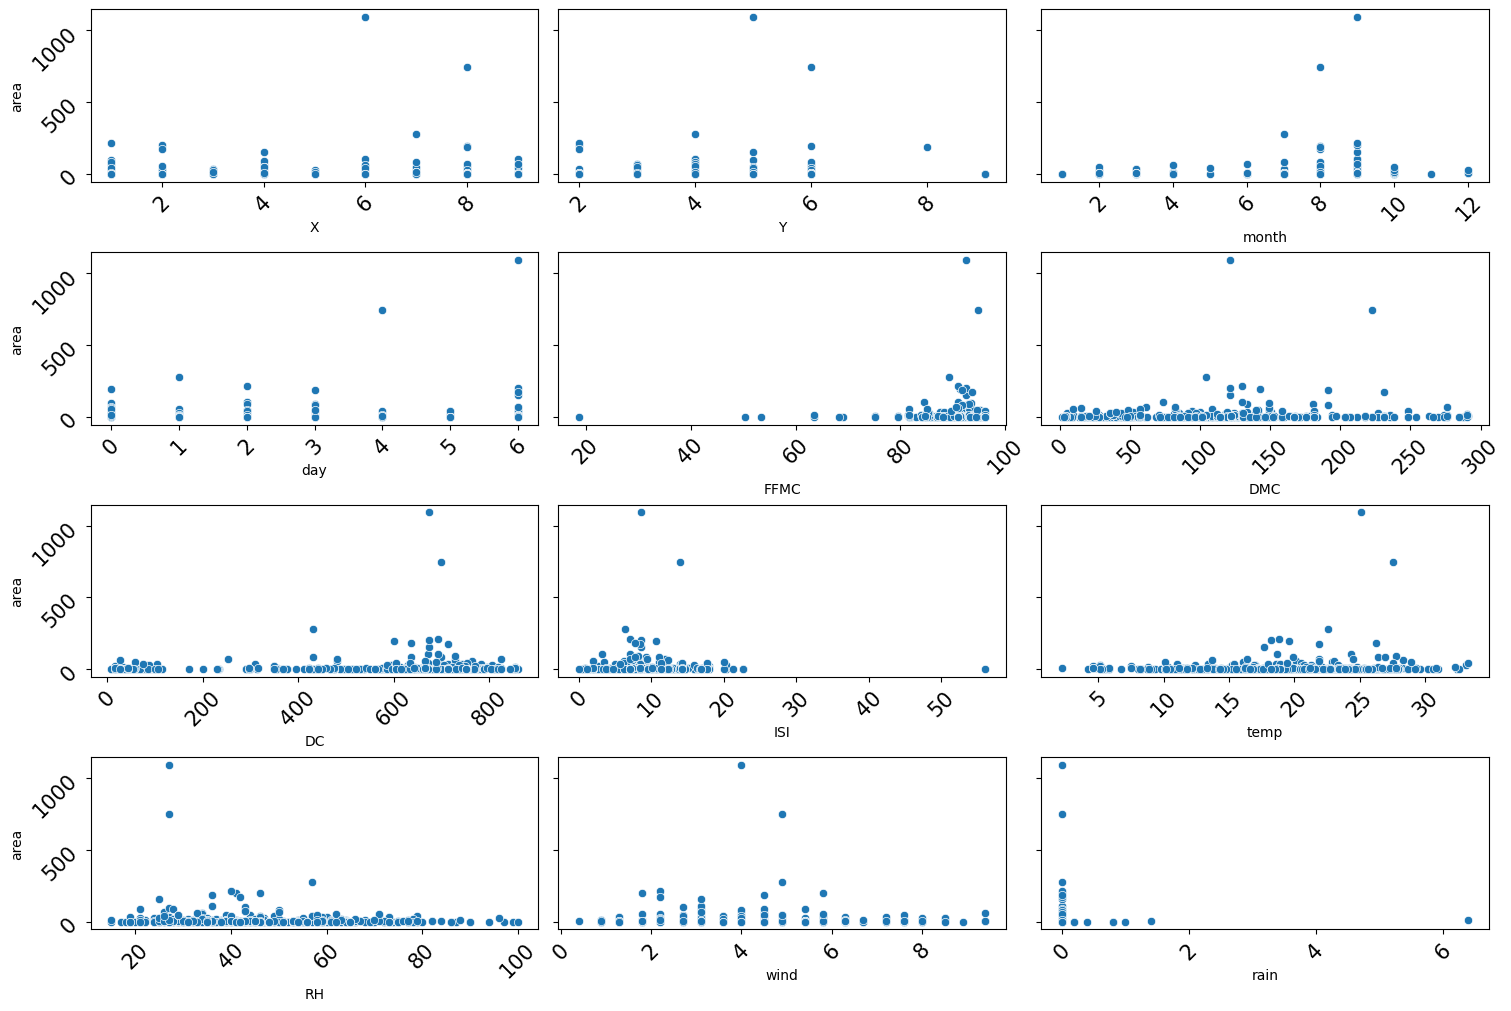

In [141]:
target = 'area'
fig, axs = plt.subplots(ncols=3, nrows=4, sharey='all', constrained_layout=True)
fig.set_figwidth(15)
fig.set_figheight(10)

for i, col_name in enumerate(df.columns[:-1]):
    ax = axs[i // 3, i % 3]  # Chỉnh sửa cú pháp để truy cập đúng vị trí của ô
    ax.tick_params(labelrotation=45, labelsize=15)  # Sửa từ tick_parans thành tick_params
    sns.scatterplot(x=col_name, y=target, data=df, ax=ax)


In [142]:
cov = np.zeros((len(df.columns[:-1]), len(df.columns[:-1])))
for i, col_name_i in enumerate(df.columns[:-1]):
    for j, col_name_j in enumerate(df.columns[:-1]):
        cov[i, j] = np.corrcoef(df[col_name_i].to_numpy(), df[col_name_j].to_numpy())[0, 1]

<Axes: >

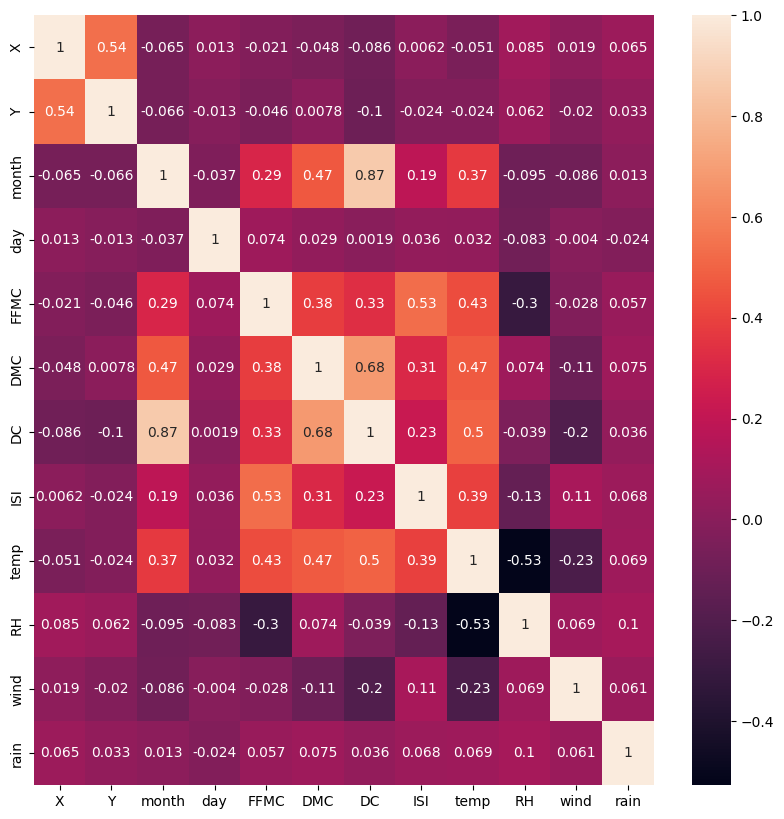

In [143]:
plt.figure(figsize = (10, 10))
sns.heatmap(cov, xticklabels=df.columns[:-1], yticklabels=df.columns[:-1], annot=cov)

In [144]:
# Ngưỡng tương quan cao
threshold = 0.8

# Ma trận tương quan
correlation_matrix = df.corr()

# Lấy các cặp tương quan cao
high_corr_features = set()

# Lấy phần tam giác trên của ma trận
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Tìm các cột có tương quan cao
for column in upper_triangle.columns:
    if any(upper_triangle[column].abs() > threshold):
        high_corr_features.add(column)

# Loại bỏ các cột có tương quan cao
df_reduced = df.drop(columns=high_corr_features)

print(f"Các cột bị loại bỏ: {high_corr_features}")


Các cột bị loại bỏ: {'DC'}


In [145]:
class LinearRegression:
    # Hàm huấn luyện mô hình hồi quy tuyến tính.
    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        cov = X.T @ X
        inv_cov = np.linalg.inv(cov)
        self.theta_: np.ndarray = inv_cov @ (X.T @ y)
    
    # Hàm tính toán sai số trung bình bình phương căn gốc (Root Mean Square Error).
    def rmse(self, y: np.ndarray, y_hat: np.ndarray) -> float:
        delta = y - y_hat
        
        return (delta**2).mean()**0.5
    
    # Hàm dự đoán các giá trị đầu ra dựa trên dữ liệu đầu vào X.
    def predict(self, X: np.ndarray) -> np.ndarray:
        y_pred = np.matmul(self.theta_.T, X.T)
        
        return y_pred

In [146]:
X = df_reduced.drop('area', axis=1)
y = df_reduced['area']

model = LinearRegression()
model.fit(X, y)

In [147]:
y_pred = model.predict(X)

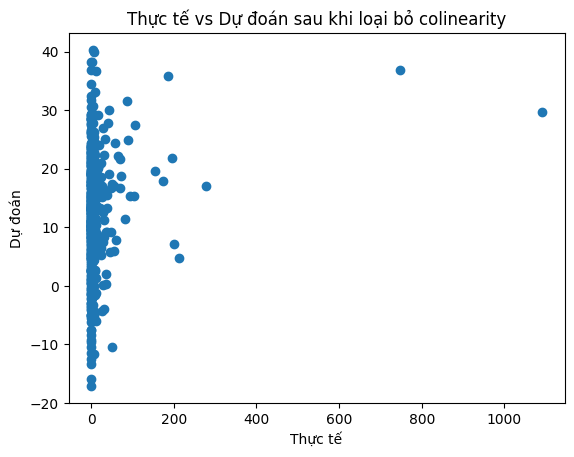

In [148]:
plt.scatter(y, y_pred)
plt.xlabel('Thực tế')
plt.ylabel('Dự đoán')
plt.title('Thực tế vs Dự đoán sau khi loại bỏ colinearity')
plt.show()

In [149]:
from sklearn.metrics import mean_squared_error, r2_score

print('MSE:', mean_squared_error(y, y_pred))
print('R2 Score:', r2_score(y, y_pred))

MSE: 3949.4300836441203
R2 Score: 0.023439714939994416
